# Assignmnet 1 (100 points)

**Name:** Jiahui Dai<br>
**Email:** jid4620@thi.de <br>
**Group:** B <br>
**Hours spend *(optional)* :** <br>

General Rules:

- No helping libraries allowed.
- The use of standard libraries provided by the programming language itself (e.g., built-in data structures like lists and dictionaries, basic input/output functions, core mathematical functions) is generally permitted. These are considered fundamental to the language and not "helping libraries" in the context of this regulation
- If you need to use special Python modules, you can discuss with your instructor before submission.
- You can use the provided libraries but not mndatary.
- Always try To bulid your code from scratch.


In [252]:
# Import modules
import os
import matplotlib.pyplot as plt
import pandas as pd

In [253]:
# Load filenames
data_folder = "data"
jungle_file = os.path.join(data_folder, "jungle_book.txt")
wiki_train_file = os.path.join(data_folder, "wiki.train.raw")
wiki_valid_file = os.path.join(data_folder, "wiki.valid.raw")
wiki_test_file = os.path.join(data_folder, "wiki.test.raw")

### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve.</p>



In [254]:
### You migh use these libraries if needed.

import matplotlib.pyplot as plt
import string
import re

###### TO DO ##########
word_freq = dict()

with open(jungle_file, "r", encoding="utf-8") as file:
    content = file.read()   # read content of file
    words = re.split(r"[^\w']+", content) # split content with non-alphabet into words, exclude '
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter

# To count word frequency
for word in words:
    word = word.lower()

    # initialise word in dict
    if word not in word_freq:
        word_freq[word] = 0

    # increase frequency
    word_freq[word] += 1

The following is a list of unique words sorted descendingly to their frequency

In [255]:
import pandas as pd

# Sort the dictionary by values in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

df = pd.DataFrame(list(sorted_word_freq.items()), columns=['Word', 'Frequency'])
df.to_csv('output/word_freq.csv', index=False)
df

,Word,Frequency
0,the,3728
1,and,2355
2,of,1348
3,to,1287
4,a,1173
...,...,...
4939,facility,1
4940,includes,1
4941,produce,1
4942,subscribe,1


**Statistical analysis**

In [256]:
rank = [i+1 for i in range(len(sorted_word_freq))]
frequencies = list(sorted_word_freq.values())

# Calculation of expected frequencies
max_freq = max(sorted_word_freq.values())
expected = [1/(i+1) * max_freq for i in range(len(sorted_word_freq))]

In [257]:
#############################
# Adapted from 
# https://medium.com/@patwariraghottam/mastering-chi-square-goodness-of-fit-tests-with-python-implementation-and-visualization-58d619b5e02c
#############################

from GoodnessOfFit import ChiSquareGoodnessOfFit

observed = frequencies  # Observed frequencies
expected = expected  # Expected frequencies (assuming uniform distribution)
  
# Create instance of ChiSquareGoodnessOfFit
chi_square_test = ChiSquareGoodnessOfFit(observed, expected)

#Calculating chi-square statistic
print("Chi-square_Statistic : {}".format(chi_square_test.calculate_chi_square()))
print("*"*70)

# Perform Chi-Square goodness of fit test with alpha = 0.05
chi_square_test.testing(0.05)

Chi-square_Statistic : 19760.11496822835
**********************************************************************
Chi-square_Critical : 5107.674219300448
**********************************************************************
Reject the null hypothesis i.e, we can say that observed and expected frequencies are different


**Graph plotting of Linear Curve and Log-Log Curve**

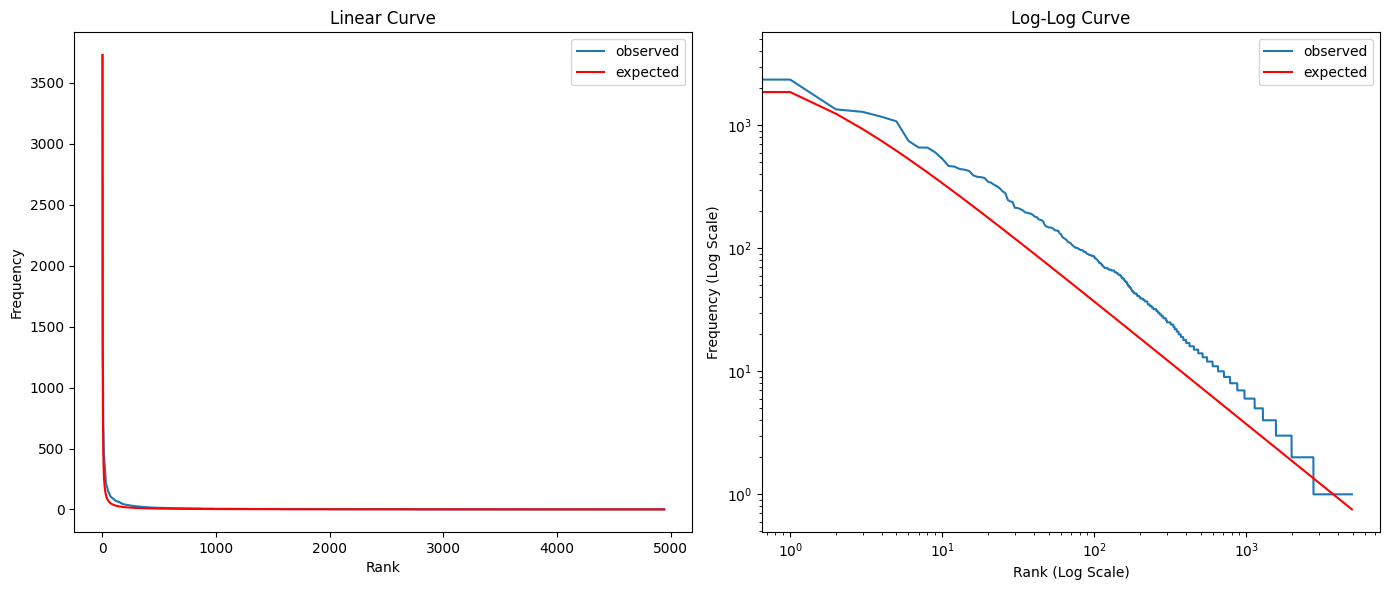

In [258]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# First subplot: Linear curve
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(rank, frequencies, label='observed')
plt.plot(rank, expected, color='red', label='expected')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Linear Curve')
plt.legend()

# Second subplot: Log-Log curve
plt.subplot(1, 2, 2)
plt.loglog(frequencies, label='observed')
plt.loglog(expected, color='red', label='expected')
plt.xlabel('Rank (Log Scale)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Log-Log Curve')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.savefig('output/q1_plot.png')
plt.show()

### Question 2: Mutual Information *(30 points)*

Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. 

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. </p>



In [259]:
### You migh use these libraries if needed.

import string
import math
from collections import Counter

###### TO DO #########
word_pair = list()
pmi_word_pair = dict()

with open(jungle_file, "r", encoding="utf-8") as file:
    content = file.read()   # read content of file
    words = re.split(r"\W+", content) # split content with non-alphabet into words
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter

# To create successive word pair
for i in range(len(words)-1):
    w1 = words[i]
    w2 = words[i+1]

    word_pair.append(f"{w1} {w2}")

# To create Counters for individual words and successive word pair
c = Counter(words)
c_pair = Counter(word_pair)

for i in range(len(words)-1):
    w1 = words[i]
    w2 = words[i+1]
    w_pair = f"{w1} {w2}"

    # ignore if w1 or w2 occurance that is < 10
    if c[w1] < 10:
        continue

    if c[w2] < 10:
        continue

    # calculate pmi
    pmi = math.log((c_pair[w_pair] * len(words)) / (c[w1] * c[w2]))

    # append to pmi word pair
    pmi_word_pair[(w1, w2)] = pmi


In [260]:
import pandas as pd

# Sort pmi_word_pair based on values (pmi) in descending order
sorted_pmi_word_pair = dict(sorted(pmi_word_pair.items(), key=lambda item: item[1], reverse=True))

# Convert sorted_pmi_word_pair dict to df
df = pd.DataFrame(list(sorted_pmi_word_pair.items()), columns=["word_pair", "pmi"])
df[['w1', 'w2']] = df['word_pair'].apply(lambda x: pd.Series(x)) # Split the word pair into w1 and w2
df = df.drop(columns=["word_pair"])                             # Drop the original "Word Pair" column
df = df[['w1', 'w2', 'pmi']]                                    # Reorder columns


List 30 word pair with highest pmi

In [261]:
top_30_rows = df.head(30)
top_30_rows.to_csv('output/top_30_rows.csv', index=False)

top_30_rows

,w1,w2,pmi
0,machua,appa,8.543339
1,united,states,8.302177
2,literary,archive,8.233184
3,cold,lairs,7.694188
4,archive,foundation,7.579258
5,bandar,log,7.414874
6,petersen,sahib,7.385887
7,stretched,myself,7.339366
8,paragraph,f,7.339366
9,hind,legs,7.234656


List 30 word pair with lowest pmi

In [262]:
bottom_30_rows = df.tail(30).iloc[::-1] # in reverse order of pmi
bottom_30_rows.to_csv('output/bottom_30_rows.csv', index=False)

bottom_30_rows

,w1,w2,pmi
14927,the,the,-5.507092
14926,and,and,-4.587357
14925,he,the,-4.280525
14924,the,he,-4.280525
14923,the,to,-3.751404
14922,of,of,-3.471520
14921,i,and,-3.300034
14920,they,the,-3.236172
14919,to,he,-3.217983
14918,was,and,-3.107196


**Statistical Analysis**

In [263]:
total = len(words)
observed = list() # conditional probability
expected = list() # unigram probability / independent probability

# Find probability of word
def word_probability(word):
    return c[word] / total

# To calculate the conditional probability of word based on its words occuring before itself
cond_prob = 1
for i, word in enumerate(words):
    word_prob = word_probability(word)
    cond_prob *= word_prob

    expected.append(word_prob)
    observed.append(cond_prob)

In [264]:
#############################
# Adapted from 
# https://medium.com/@patwariraghottam/mastering-chi-square-goodness-of-fit-tests-with-python-implementation-and-visualization-58d619b5e02c
#############################

from GoodnessOfFit import ChiSquareGoodnessOfFit

observed = observed  # Observed frequencies
expected = expected  # Expected frequencies (assuming uniform distribution)
  
# Create instance of ChiSquareGoodnessOfFit
chi_square_test = ChiSquareGoodnessOfFit(observed, expected)

#Calculating chi-square statistic
print("Chi-square_Statistic : {}".format(chi_square_test.calculate_chi_square()))
print("*"*70)

# Perform Chi-Square goodness of fit test with alpha = 0.05
chi_square_test.testing(0.05)

Chi-square_Statistic : 572.4405452818747
**********************************************************************
Chi-square_Critical : 57009.8446715156
**********************************************************************
fail to reject the null hypothesis i.e, observed and expected frequencies are same


### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements.</p>



<h4> Datasets and Resources </h4>

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [ ]:
######## You might use these libraries if needed.

import math
from collections import defaultdict, Counter
import string
import re
import os
import random
import math
import numpy as np

####### TO DO #######

# Load dataset
def load_dataset(filename):
    with open(filename, "r", encoding="utf-8") as file:
        content = file.read()
    return content

# Data Preprocessing: Tokenization and cleaning
def preprocess(text):
    words = re.split(r"\W+", text) # split content with non-alphabet into words
    words = [word.lower() for word in words if word.isalpha()] # make all words lower letter
    return words


class NgramModel():

    # Initialise N-gram model
    def __init__(self, n):
        self.n = n
        self.ngram_model = defaultdict(lambda: defaultdict(int))
        self.ngram_probabilities = defaultdict(lambda: defaultdict(float))
        self.best_k = None # not 0
        self.lowest_perplexity = float("inf")


    def build_ngram_model(self, words):
        """
        Generate n-grams and count frequency of occurance
        """
        # Process words
        self.words = words
        self.unique_words = set(self.words)
        
        w = words

        n = self.n
        for i in range(len(w) - (n - 1)):
            prefix = tuple(w[i : i + (n - 1)])  # Extract (n-1)-gram prefix
            next_word = w[i + (n - 1)]          # Next word in the sequence
            self.ngram_model[prefix][next_word] += 1

        self.unique_ngram_prefix = set(self.ngram_model.keys())

    def calculate_ngram_probabilities(self, k=0):
        """
        Calculation of n-gram probability
        k input -> use of Add-K algorithm
        """
        ngram_model = self.ngram_model
        V = len(self.unique_words)

        for prefix in ngram_model:
            denominator = sum(ngram_model[prefix].values()) + k * V  # Computes the denominator and apply Add-K algorithm
            for next_word in ngram_model[prefix]:
                self.ngram_probabilities[prefix][next_word] = (ngram_model[prefix][next_word] + k) / denominator

    def perplexity(self, w):
        """
        Calculate perplexity
        """
        N = len(w)
        n = self.n # n-gram

        if N == 0:
            raise Exception("Text is empty, cannot evaluate perplexity.")
        
        # According to formula
        log_sum = 0
        for i in range(len(w) - (n - 1)):
            w1, w2 = w[i:i+(n-1)], w[i+(n-1)]
            p = self.ngram_probabilities[tuple(w1)].get(w2, 1/len(self.ngram_probabilities)) # if w2 not found, default to 1/all possible combinations
            log_sum += math.log2(p)  # Sum log probabilities
        
        return 2 ** (-log_sum / N)

    def train(self, train_data):
        """Train model = Build model"""
        self.build_ngram_model(train_data)

    def evaluate(self, val_data):
        """Evaluate model with validation data"""
        return self.perplexity(val_data)

    def train_best_model(self):
        self.calculate_ngram_probabilities(self.best_k)

    def optimise(self, k_values, val_data, test_data):
        """
        Optimise model with validation data, with different k values
        Evaluate model with test data
        """

        self.train_perplexity = []
        self.test_perplexity = []

        for k in k_values:
            self.calculate_ngram_probabilities(k)
            val_perplexity = self.evaluate(val_data)

            # To store the better metrics of lower perplexity
            if val_perplexity < self.lowest_perplexity and self.best_k != 0:
                self.lowest_perplexity = val_perplexity
                self.best_k = k

            # For perplexity graph
            self.train_perplexity.append(self.evaluate(self.words))
            self.test_perplexity.append(self.evaluate(test_data))


    def plot_perplexity(self, k_values, output_file="output/perplexity-plot.png"):
        """
        Plot the perplexity curves for both training and test data.
        """
        plt.plot(k_values, self.train_perplexity, label="Train Perplexity", marker='o')
        plt.plot(k_values, self.test_perplexity, label="Test Perplexity", marker='o')

        plt.xscale('log')
        plt.xlabel('k (log scale)')
        plt.ylabel('Perplexity')
        plt.title(f'Perplexity of {self.n}-Gram model')
        plt.legend()
        plt.grid(True)
        plt.savefig(output_file)
        plt.show()

    
    # Calculation of log sum probability
    def calculate_logsum_probability(self, test_data):
        """
        Calculate log sum probabilities
        """
        w = test_data
        N = len(w)

        # According to formula
        log_sum = 0
        for i in range(N-1):
            w1, w2 = w[i], w[i+1]
            p = self.ngram_probabilities[tuple(w1)].get(w2, 1/len(self.ngram_probabilities)) # if w2 not found, default to 1/all possible combinations
            log_sum += math.log2(p)  # Sum log probabilities

        return log_sum
    
    def plot_logsum_probability(self, p_values_train, p_values_test, k_values, output_file="output/logsum-plot.png"):
        """
        Plot log sum probabilities
        """
        # plt.plot(k_values, p_values_train, label="Train", marker='o')
        plt.plot(k_values, p_values_test, label="Test", marker='o')

        plt.xscale('log')
        plt.xlabel('k (log scale)')
        plt.ylabel('Log Sum Probabilities')
        plt.title(f'Log Sum Probabilities of {self.n}-Gram Model')
        plt.legend()
        plt.grid(True)
        plt.savefig(output_file)
        plt.show()


    #  Text generation
    def generate_text(self, start_words: list, length=50):
        """
        To generated predictive text given a set of string with n-words.
        """
        if len(start_words) != self.n - 1:
            raise ValueError(f"For an {self.n}-gram model, {self.n - 1} starting words is needed.")

        current_words = tuple(start_words)  # initialise with start words
        generated_words = list(start_words)

        for _ in range(length - self.n + 1):
            next_words = self.ngram_probabilities.get(current_words)

            # Get a random word if current word does exist in trained data
            if not next_words:
                next_words = self.ngram_probabilities.get(random.choice(list(self.unique_ngram_prefix)))

            # Convert to list of words and their associated probabilities
            words, probs = zip(*next_words.items())
            next_word = random.choices(words, probs)[0]
            generated_words.append(next_word)

            # Update the current context (sliding window)
            current_words = tuple(generated_words[-(self.n - 1):])

        return " ".join(generated_words)

In [266]:
# Load dataset and preprocess
train_content = load_dataset(wiki_train_file)
val_content = load_dataset(wiki_valid_file)
test_content = load_dataset(wiki_test_file)

train_words = preprocess(train_content)
val_words = preprocess(val_content)
test_words = preprocess(test_content)

# K-values
k_values = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
k_values.sort()

**Bigram Model**

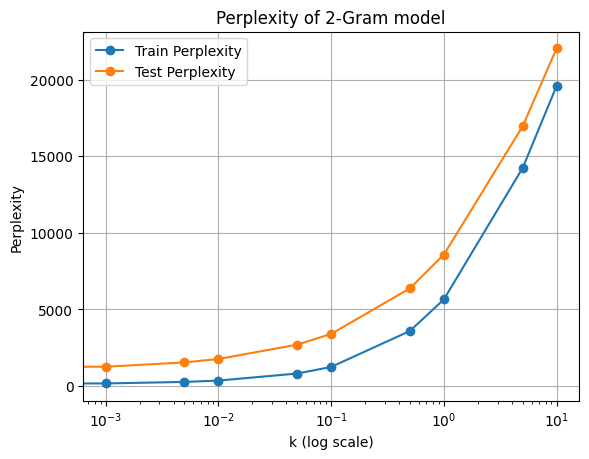

Best k: 0 
Lowest perplexity: 971.1286877853468


In [267]:
# Load model
bigram = NgramModel(2)
bigram.train(train_words)
bigram.optimise(k_values, val_words, test_words)
bigram.plot_perplexity(k_values, "output/bigram-perplexity.png")

print(f"Best k: {bigram.best_k} \nLowest perplexity: {bigram.lowest_perplexity}")

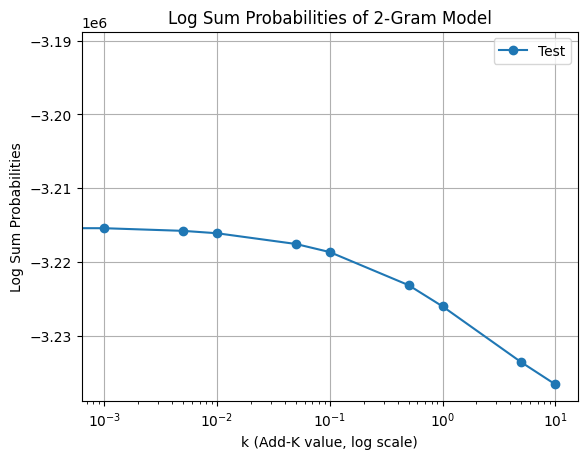

In [268]:
# Dependent on previous cell
p_values_train = []
p_values_test = []
for k in k_values:
    bigram.calculate_ngram_probabilities(k)
    # p_values_train.append(bigram.calculate_logsum_probability(train_words))
    p_values_test.append(bigram.calculate_logsum_probability(test_words))
bigram.plot_logsum_probability(p_values_train, p_values_test, k_values, output_file="output/bigram-logsum.png")
    

**Testing with increasing n of n-Gram models**
with word generation

In [269]:
text = """
    In December 759 , he briefly stayed in Tonggu ( modern Gansu ) . He departed on December 24 for Chengdu ( Sichuan province ) , where he was hosted by local Prefect and fellow poet Pei Di . Du subsequently based himself in Sichuan for most of the next five years . By the autumn of that year he was in financial trouble , and sent poems begging help to various acquaintances . He was relieved by Yan Wu , a friend and former colleague who was appointed governor general at Chengdu . Despite his financial problems , this was one of the happiest and most peaceful periods of his life . Many of Du 's poems from this period are peaceful depictions of his life at " thatched hut " . In 762 , he left the city to escape a rebellion , but he returned in summer 764 when he was appointed an advisor to Yan , who was involved in campaigns against the Tibetan Empire . 
"""

words = preprocess(text)

In [270]:
generated_texts = dict()
ngram_lowest_perplexity = dict()
ngrams_unique_prefix_count = dict()

for i in [1, 3, 4, 5, 10, 20]:
    # Train various n-grams
    model = NgramModel(i)
    model.train(train_words)
    model.optimise(k_values, val_words, test_words)
    ngram_lowest_perplexity[model.n] = model.lowest_perplexity
    ngrams_unique_prefix_count[model.n] = len(model.unique_ngram_prefix)

    # word generation
    model.train_best_model()
    generated_texts[model.n] = model.generate_text(words[:model.n - 1])

In [271]:
# Add initial bigram for comparison
bigram.train_best_model()
ngram_lowest_perplexity[bigram.n] = bigram.lowest_perplexity
ngrams_unique_prefix_count[bigram.n] = len(bigram.unique_ngram_prefix)
generated_texts[bigram.n] = bigram.generate_text(words[:bigram.n-1])

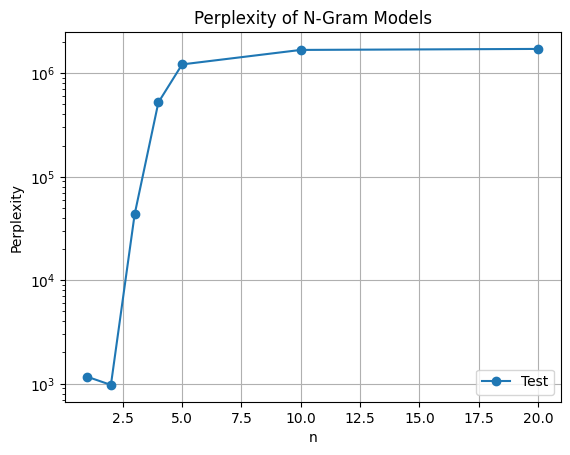

In [272]:
# Plot comparison graph with perplexity against n
sorted_ngram_lowest_perplexity = dict(sorted(ngram_lowest_perplexity.items(), key=lambda item: item[0]))

plt.plot(sorted_ngram_lowest_perplexity.keys(), sorted_ngram_lowest_perplexity.values(), label="Test", marker='o')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Perplexity')
plt.title(f'Perplexity of N-Gram Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("output/sorted_ngram_lowest_perplexity.png")
plt.show()

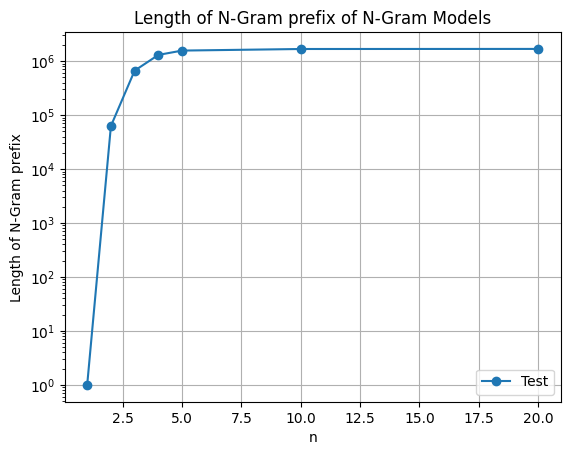

In [273]:
# Plot comparison graph with length of unique prefix of n-grams against n
sorted_ngrams_unique_prefix_count = dict(sorted(ngrams_unique_prefix_count.items(), key=lambda item: item[0]))

plt.plot(sorted_ngrams_unique_prefix_count.keys(), sorted_ngrams_unique_prefix_count.values(), label="Test", marker='o')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Length of N-Gram prefix')
plt.title(f'Length of N-Gram prefix of N-Gram Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("output/sorted_ngrams_unique_prefix_count.png")
plt.show()

In [274]:
# Create an output file
sorted_generated_texts = dict(sorted(generated_texts.items(), key=lambda item: item[0]))
df = pd.DataFrame(list(sorted_generated_texts.items()), columns=["n", "Generated Text"])
df.to_csv('output/ngram_generated_text.csv', index=False)


### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*


- Calculate Bigram Probabilities with Back-off.
- Demonstrate and discuss your Back-off implementation.


In [275]:
class NgramModel_Backoff:

    def __init__(self, n: int, lambda_: int):
        self.n = n
        self.lambda_ = lambda_

        # Initialise n-grams model from 1,...,n
        self.ngram_models = {i+1: defaultdict(lambda: defaultdict(int)) for i in range(n-1)}
        

    def train(self, words):
        """
        Train model by
        Generate n-grams and count frequency of occurance
        from 1,...,n
        """
        # Process words
        self.words = words
        self.unique_words = set(self.words)

        for i in range(self.n):
            i_gram = NgramModel(i+1)
            i_gram.train(words)
            i_gram.calculate_ngram_probabilities() # Add-k algorithm is not considered
            self.ngram_models[i+1] = i_gram

    def S(self, prefix, word, N=None):
        """
        Calculate the stupid backoff score/probability
        """
        ngram_order = len(prefix) + 1 # prefix is n-1

        # Case: Unigram
        if ngram_order == 1:
            unigram = self.ngram_models[ngram_order]
            return unigram.ngram_model[prefix].get(word, 0) / len(unigram.words)

        # Probability calculation
        ngram_count = self.ngram_models[ngram_order][prefix].get(word, 0)
        prefix_count = sum(self.ngram_models[ngram_order-1][prefix].values())

        if ngram_count > 0:
            return ngram_count / prefix_count
        else:
            return self.lambda_ * self.S(prefix[1:], word)

    def generate_text(self, start_words: list, length=50):
        """
        To generated predictive text given a set of string with n-words, on N-Gram mdoel with backoff algorithm.
        """
        if len(start_words) != self.n - 1:
            raise ValueError(f"For an {self.n}-gram model, {self.n - 1} starting words are needed.")
        
        ngram_order = len(start_words) + 1
        current_words = tuple(start_words)  # initialise with start words
        generated_words = list(start_words)
        

        for _ in range(length - self.n + 1):
            next_word_candidates = self.ngram_models[self.n].ngram_model.get(current_words, {})
            
            if next_word_candidates:
                # Get next word based on n-gram probabilities
                words, probs = zip(*next_word_candidates.items())
                next_word = random.choices(words, weights=probs)[0]
            else:
                # Backoff: Reduce context size and try lower-order n-gram
                next_word = self.get_word_from_backoff(current_words[1:])
            
            generated_words.append(next_word)
            current_words = tuple(generated_words[-(self.n - 1):])  # Update sliding window

        return " ".join(generated_words)
    
    def get_word_from_backoff(self, prefix):
        ngram_order = len(prefix) + 1

        # Case: Unigram
        if ngram_order == 1:
            unigram = self.ngram_models[ngram_order]
            return random.choice(list(self.unique_words))
        
        # Find next word with backoff
        next_word_candidates = self.ngram_models[ngram_order].ngram_model.get(prefix, {})

        if next_word_candidates:
            words, probs = zip(*next_word_candidates.items())
            next_word = random.choices(words, weights=probs)[0]
            return next_word
        else:
            return self.get_word_from_backoff(prefix[1:])

**2-Gram Model with Backoff**

In [276]:
bigram_bo = NgramModel_Backoff(2, lambda_=0.7)
bigram_bo.train(train_words)
gen_text = bigram_bo.generate_text(words[:bigram_bo.n-1])

# Output & Dependent on the text corpus in Question 3
with open("output/generated_text.txt", "w", encoding="utf-8") as f:
    f.write(gen_text)

gen_text

'in the front the project stemmed from the younger raised to and about homes the infant daughter lateefa was the director robert waller with acid corresponding to choose to care to gain favor but did not required and seven unassisted simply considering the parents also confronting these changes clothing as'